# Data Structures: Dictionaries and Tuples
*PY4E Textbook*

## Dictionaries


A dictionary is like a list, but more general. In a list, the index positions have to be integers; in a dictionary, the indices can be (almost) any type.

You can think of a dictionary as a mapping between a set of indices (which are called *keys*) and a set of values. Each key maps to a value. The association of a key and a value is called a *key-value pair* or sometimes an item.

As an example, we’ll build a dictionary that maps from English to Spanish words, so the keys and the values are all strings.



In [ ]:
eng2sp = {'one': 'uno', 'two': 'dos', 'three': 'tres'}
print(eng2sp)

{'one': 'uno', 'two': 'dos', 'three': 'tres'}


The elements of a dictionary are never indexed with integer indices. Instead, you use the keys to look up the corresponding values:

In [ ]:
print(eng2sp['two'])

dos


The key `'two'` always maps to the value “dos” so the order of the items doesn’t matter.

If the key isn’t in the dictionary, you get an exception:

In [ ]:
print(eng2sp['four'])

KeyError: 'four'

The `len` function works on dictionaries; it returns the number of key-value pairs:

In [ ]:
len(eng2sp)

3

The `in` operator works on dictionaries; it tells you whether something appears as a `key` in the dictionary (appearing as a value is not good enough).

In [ ]:
print('one' in eng2sp)

print('uno' in eng2sp)

True
False


To see whether something appears as a value in a dictionary, you can use the method `values`, which returns the values as a type that can be converted to a list, and then use the `in` operator:

In [ ]:
vals = list(eng2sp.values())
vals


['uno', 'dos', 'tres']

In [ ]:
print('uno' in vals)

True


## Dictionary as a set of counters
Suppose you are given a string and you want to count how many times each letter appears.

In [ ]:
word = 'brontosaurus'
d = dict()
d

{}

In [ ]:
word = 'brontosaurus'
d = dict() # Initialize an empty dictionary to store letter counts.
for letter in word: # Loop over each letter in the word.
    if letter not in d: # Check if the letter is not yet in the dictionary.
        d[letter] = 1  # If not, add the letter as a key with an initial count of 1.
    else:
        d[letter] = d[letter] + 1  # increment its count by 1.
print(d)

{'b': 1, 'r': 2, 'o': 2, 'n': 1, 't': 1, 's': 2, 'a': 1, 'u': 2}


We are effectively computing a histogram, which is a statistical term for a set of counters (or frequencies).


Here’s how it works step-by-step:

- The loop goes through each letter in word, which is "brontosaurus".
- If the letter isn’t already a key in d, it’s added with a count of 1.
- If the letter is already in d, its count is incremented by 1.
- At the end, d holds the counts of only the letters that appear in "brontosaurus".

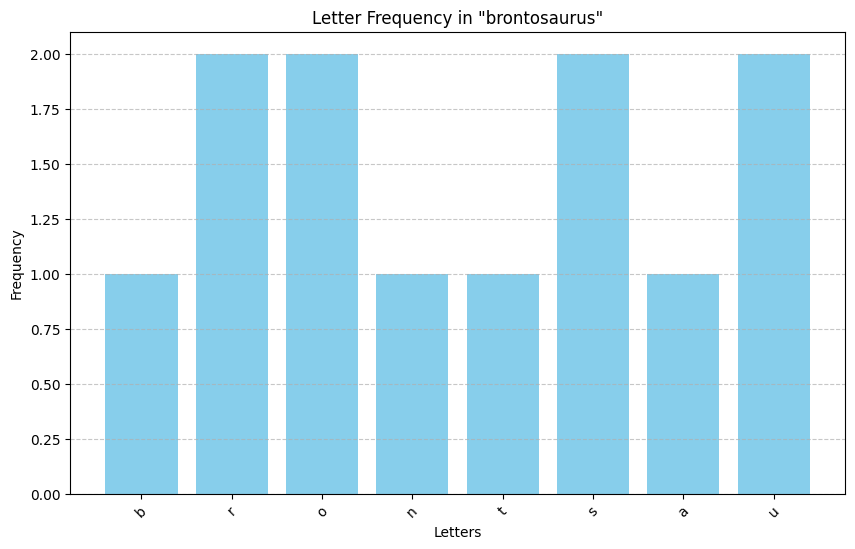

In [ ]:
# No need to understand the code for drawing the histogram, just show the histogram figure result
import matplotlib.pyplot as plt

# Given word and counting letters
word = 'brontosaurus'
d = dict()
for letter in word:
    if letter not in d:
        d[letter] = 1
    else:
        d[letter] += 1

# Drawing the histogram
letters = list(d.keys())
counts = list(d.values())

plt.figure(figsize=(10, 6))
plt.bar(letters, counts, color='skyblue')
plt.title('Letter Frequency in "brontosaurus"')
plt.xlabel('Letters')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the histogram
plt.show()


Dictionaries have a method called `get` that takes a key and a default value. If the key appears in the dictionary, `get` returns the corresponding value; otherwise it returns the default value. For example:

In [ ]:
counts = { 'chuck' : 1 , 'annie' : 42, 'jan': 100}
print(counts.get('jan', 0))

print(counts.get('tim', 0))

100
0


We can use `get` to write our histogram loop more concisely. Because the `get` method automatically handles the case where a key is not in a dictionary, we can reduce four lines down to one and eliminate the `if` statement.

In [ ]:
word = 'brontosaurus'
d = dict()
for c in word:
    d[c] = d.get(c,0) + 1
print(d)

{'b': 1, 'r': 2, 'o': 2, 'n': 1, 't': 1, 's': 2, 'a': 1, 'u': 2}


# Dictionaries and files
One of the common uses of a dictionary is to count the occurrence of words in a file with some written text. Let’s start with a very simple file of words taken from the text of Romeo and Juliet.

For the first set of examples, we will use a shortened and simplified version of the text with no punctuation. Later we will work with the text of the scene with punctuation included.

But soft what light through yonder window breaks

It is the east and Juliet is the sun

Arise fair sun and kill the envious moon

Who is already sick and pale with grief

We will write a Python program to read through the lines of the file, break each line into a list of words, and then loop through each of the words in the line and count each word using a dictionary.


You will see that we have two `for` loops. The outer loop is reading the lines of the file and the inner loop is iterating through each of the words on that particular line. This is an example of a pattern called nested loops because one of the loops is the *outer* loop and the other loop is the *inner* loop.

Because the inner loop executes all of its iterations each time the outer loop makes a single iteration, we think of the inner loop as iterating “more quickly” and the outer loop as iterating more slowly.

The combination of the two nested loops ensures that we will count every word on every line of the input file.

In [ ]:
# Provided text block as a multiline string for analysis
text = """But soft what light through yonder window breaks
It is the east and Juliet is the sun
Arise fair sun and kill the envious moon
Who is already sick and pale with grief"""

# Dictionary to store the count of each unique word
counts = dict()

# Looping through each line in the provided text
for line in text.splitlines(): # Splits the text into individual lines, looping over each one
    words = line.split()    # Splits each line into words (splitting on spaces)
    # Looping through each word in the line
    for word in words:     # Loops over each word in the list of words
        if word not in counts: # Checks if the word has not yet been counted
            counts[word] = 1  # If not, Adds the word to the dictionary with an initial count of 1
        else:
            counts[word] += 1 # If the word is already in the dictionary, increase its count by 1

# Display the final dictionary with word counts
counts



{'But': 1,
 'soft': 1,
 'what': 1,
 'light': 1,
 'through': 1,
 'yonder': 1,
 'window': 1,
 'breaks': 1,
 'It': 1,
 'is': 3,
 'the': 3,
 'east': 1,
 'and': 3,
 'Juliet': 1,
 'sun': 2,
 'Arise': 1,
 'fair': 1,
 'kill': 1,
 'envious': 1,
 'moon': 1,
 'Who': 1,
 'already': 1,
 'sick': 1,
 'pale': 1,
 'with': 1,
 'grief': 1}

### Dictionaries in Python vs. JSON (JavaScript Object Notation) objects

Example:
``` python
# A Python dictionary storing user information
user_info = {
    "name": "Alice",
    "age": 30,
    "email": "alice@example.com",
    "is_active": True,
    "preferences": ["reading", "traveling", "music"]
}
```

```json
{
    "name": "Alice",
    "age": 30,
    "email": "alice@example.com",
    "is_active": true,
    "preferences": ["reading", "traveling", "music"]
}
```

Here’s a comparison:

1. Structure and Syntax
- Dictionaries are a Python-specific data structure with key-value pairs. Keys in Python dictionaries can be any immutable data type (e.g., strings, numbers, or tuples).
- JSON objects are a language-agnostic data format commonly used for data exchange. In JSON, keys are always strings, and values must be specific data types (string, number, array, object, true, false, or null).
2. Data Representation and Usage
- Dictionaries are used within Python code for quick lookups, easy data manipulation, and efficient access.
- JSON objects are primarily used to transfer data between a server and a web application. JSON is also readable across different programming languages.
3. Portability and Compatibility
- Dictionaries are limited to Python.
- JSON objects can be written to and read from files, making them a common choice for configuration, data exchange, and web services.

### Please refer to the Textbook for more details about Dictionaires.

# Tuples

## Tuples are immutable

A tuple1 is a sequence of values much like a list. The values stored in a tuple can be any type, and they are indexed by integers. The important difference is that tuples are **immutable**. Tuples are also comparable and hashable so we can sort lists of them and use tuples as key values in Python dictionaries.


Syntactically, a tuple is a comma-separated list of values:

Although it is not necessary, it is common to enclose tuples in parentheses to help us quickly identify tuples when we look at Python code:

In [ ]:
t = ('a', 'b', 'c', 'd', 'e')
print(t)
type(t)

('a', 'b', 'c', 'd', 'e')


tuple

What would `t` look like if it is a `list`? or a `string`? or a `dictionary`?
Hint:
- Lists are denoted by square brackets []
- Strings represent a sequence of characters without any separators
- In a dictionary, each element requires a key-value pair.

Most list operators also work on tuples. The bracket operator indexes an element:

In [ ]:
t = ('a', 'b', 'c', 'd', 'e')
print(t[0])
print(t[1:3])
t[0] = 'A'
# if you try to modify one of the elements of the tuple, you get an error

a
('b', 'c')


TypeError: 'tuple' object does not support item assignment

In [ ]:
# You can’t modify the elements of a tuple, but you can replace one tuple with another
t = ('A',) + t[1:]
print(t)

('A', 'b', 'c', 'd', 'e')


### Dictionaries and tuples
Dictionaries have a method called `items` that returns a list of tuples, where each tuple is a key-value pair:
As you should expect from a dictionary, the items are in non-alphabetical order.


In [ ]:
d = {'b':1, 'a':10, 'c':22}
t = list(d.items())
print(t)


[('b', 1), ('a', 10), ('c', 22)]


In [1]:
d = {'b':1, 'a':10, 'c':22}
t = list(d.items())
print(t)
t.sort() # since the list of tuples is a list, we can sort the list of tuples
print(t)

[('b', 1), ('a', 10), ('c', 22)]
[('a', 10), ('b', 1), ('c', 22)]


### Multiple assignment with dictionaries
Combining `items`, tuple assignment, and `for`, you can see a nice code pattern for traversing the keys and values of a dictionary in a single loop:


In [4]:
d = {'a':10, 'b':1, 'c':22}
for key, val in d.items():
    print(val, key)

10 a
1 b
22 c


**Is it possible to change `key`, `val` into other varaible names?**

Yes, you can change `key` and `val` to any other variable names, like `k` and `v`. This works because Python allows you to name loop variables freely; they just act as placeholders for each key-value pair in the dictionary `d`.

**If I do not use `d.items()`, can I still get key and value?**

The `for key, val in d.items()` loop works by iterating over each item in `d`, where `.items()` returns key-value pairs.

If you don’t use `d.items()`, you’d have to get each value by accessing the dictionary with its key, which makes the code a bit longer.

In [5]:
d = {'a': 10, 'b': 1, 'c': 22}
for key in d:  # Only iterates over keys
    val = d[key]  # Manually retrieve each value
    print(val, key)


10 a
1 b
22 c
